<a href="https://colab.research.google.com/github/pavithra64/Retail_sales_prediction/blob/main/Retail_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Model Development**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
joined_data=pd.read_csv("/content/joined_data.csv")

In [4]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

joined_data['StoreType'] = label_encoder.fit_transform(joined_data['StoreType'])
joined_data['Assortment'] = label_encoder.fit_transform(joined_data['Assortment'])
# joined_data['StateHoliday'] = label_encoder.fit_transform(joined_data['StateHoliday'])

# Head
joined_data.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
Year,2015,2015,2015,2015,2015
Month,7,7,7,7,7


In [5]:
joined_data['Date'].head()

,Date
0,2015-07-31
1,2015-07-31
2,2015-07-31
3,2015-07-31
4,2015-07-31


In [6]:
# correlation heat map
plt.figure(figsize = (18,10))
joined_data['Date'] = pd.to_datetime(joined_data['Date'])

if 'Year' in joined_data.columns:
    joined_data.drop(["Year"],axis=1,inplace=True)

<Figure size 1800x1000 with 0 Axes>

<Axes: >

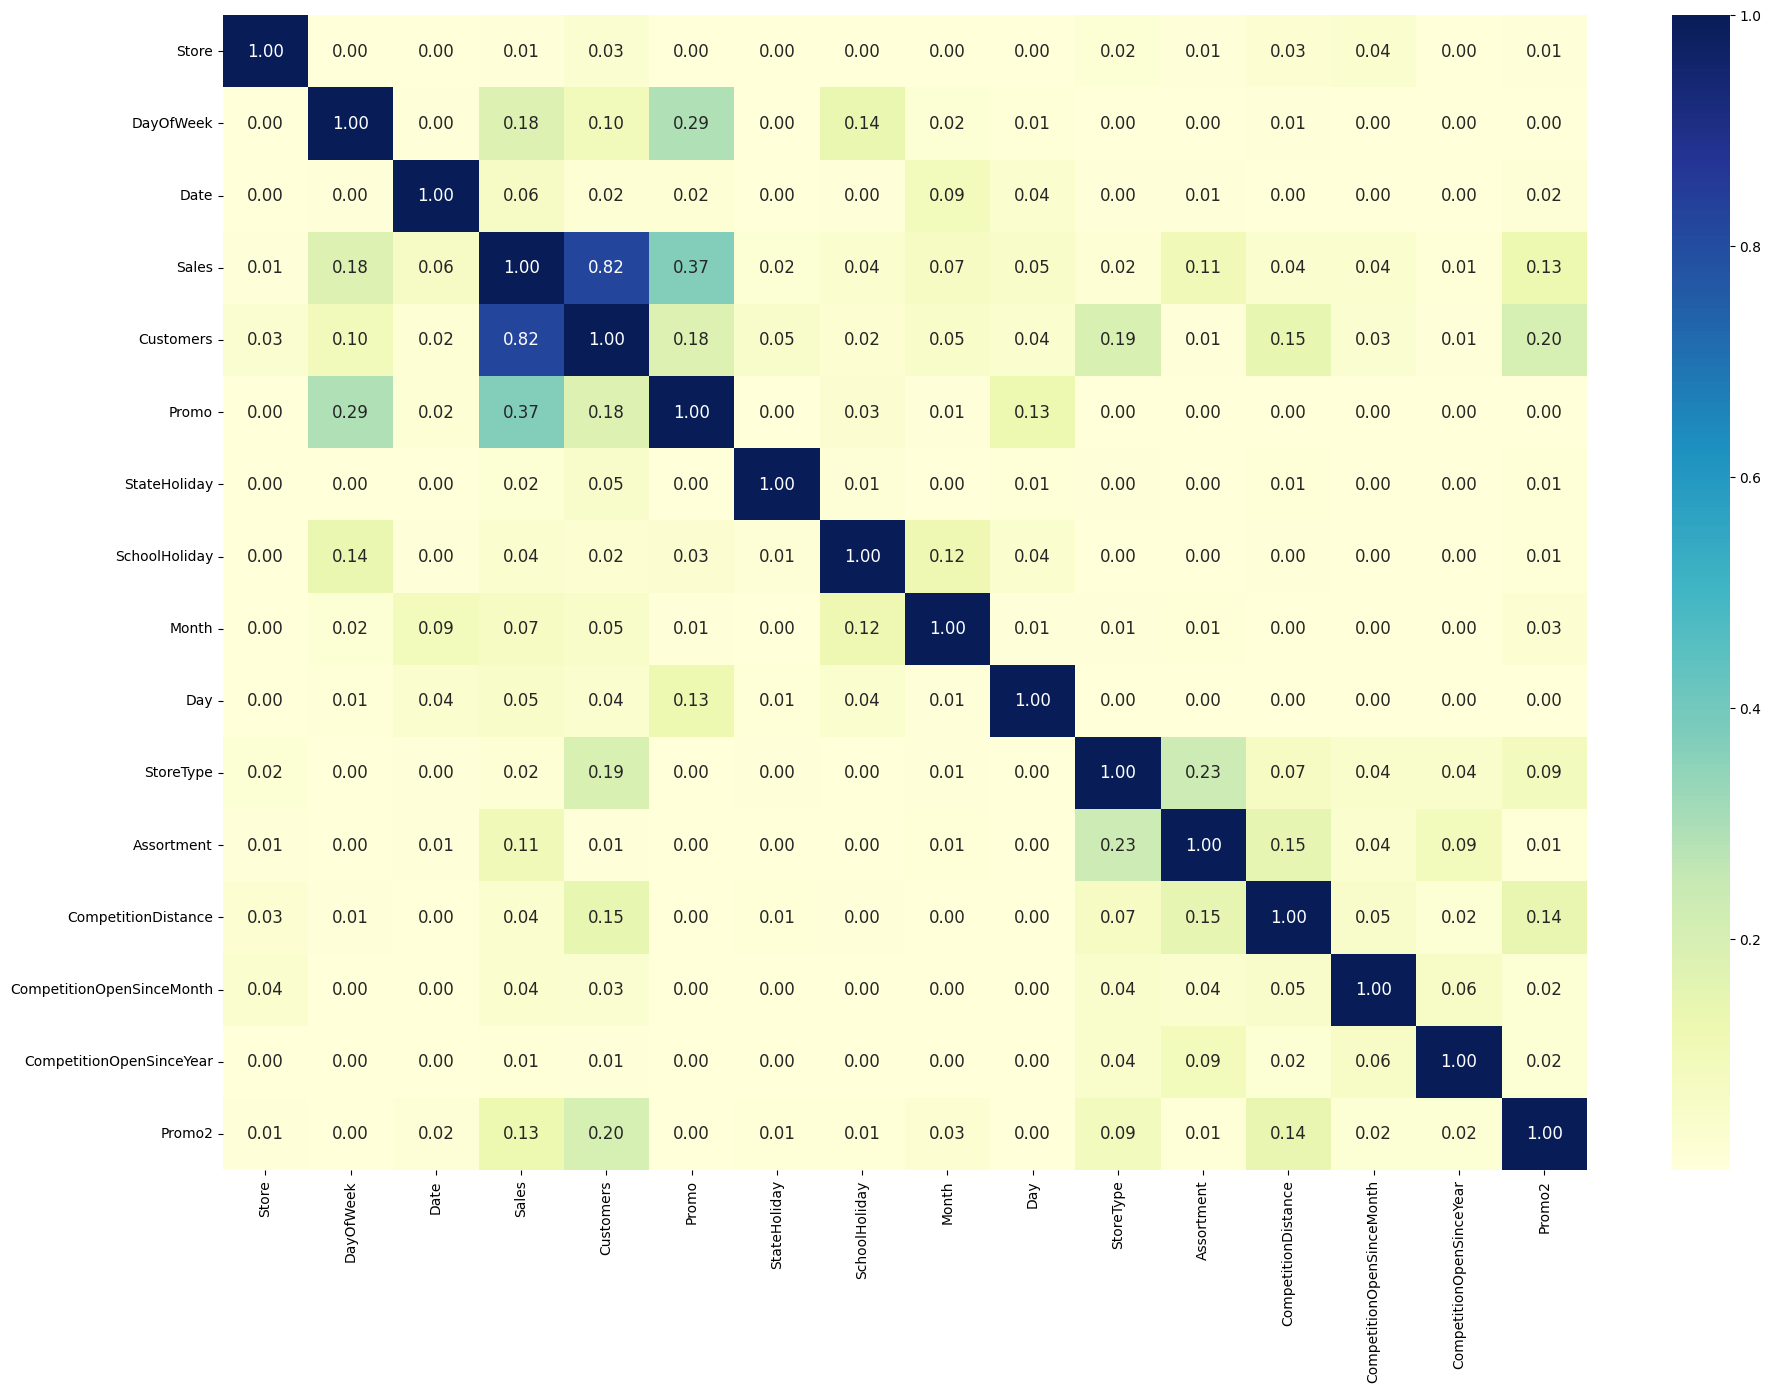

In [7]:
joined_data['StateHoliday'] = joined_data['StateHoliday'].astype(str)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
joined_data['StateHoliday'] = label_encoder.fit_transform(joined_data['StateHoliday'])

correlation=joined_data.corr()

plt.figure(figsize = (22,15)) # Increased figure size
sns.heatmap(abs(correlation), annot = True, cmap = 'YlGnBu', fmt=".2f", annot_kws={"size": 12})

In [8]:
# Dropping store and date columns because they are irrelevant
joined_data.drop(['Store', 'Date'], axis = 1, inplace = True)

In [9]:
# importing ML models
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# Evaluation Metrics
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [12]:
# Cheching for inf values
np.isinf(joined_data['Sales']).sum()

np.int64(0)

**Train-test split**

In [13]:
X = joined_data.drop('Sales', axis=1)
y = joined_data['Sales']


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Linear Regression Model**

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 1521.5669634143042
R²: 0.7599312528068808


**Decision Tree Model**

In [18]:
dt = DecisionTreeRegressor(
    criterion='squared_error',     # Mean Squared Error
    max_depth=None,      # No max depth by default (fully grown tree)
    min_samples_split=2, # Minimum samples to split a node
    min_samples_leaf=1,  # Minimum samples at a leaf node
    random_state=42
)

# Train the model
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [19]:
y_pred = dt.predict(X_test)

In [20]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("Decision Tree RMSE:", rmse)
print("Decision Tree R²:", r2)

Decision Tree RMSE: 720.4174133912963
Decision Tree R²: 0.9461827020337145


In [21]:
rf = RandomForestRegressor(
    n_estimators=30,       # number of trees
    max_depth=None,          # no max depth (fully grown)
    min_samples_split=2,     # min samples to split a node
    random_state=42,
    n_jobs=-1                # use all CPU cores
)

rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=42)

In [22]:
y_pred = rf.predict(X_test)


In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest RMSE:", rmse)
print("Random Forest R²:", r2)

Random Forest RMSE: 528.1864238959079
Random Forest R²: 0.9710713641837915


In [26]:
import joblib
joblib.dump(lr, 'linear_regression_model.pkl')
joblib.dump(dt, 'decision_tree_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']